<a href="https://colab.research.google.com/github/shreya1603/Second-hand-car-price-prediction/blob/main/Second_hand_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [ ]:
raw_data = pd.read_csv('1.04. Real-life example.csv')

In [ ]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [ ]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [ ]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [ ]:
data=raw_data.dropna(axis=0)

In [ ]:
data=data.drop(['Year'],axis=1)

In [ ]:
data.describe(include='all')


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025
unique,7,NaN,6,NaN,NaN,4,2,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,NaN


C:\Users\91930\AppData\Local\Temp\ipykernel_7400\4196895882.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

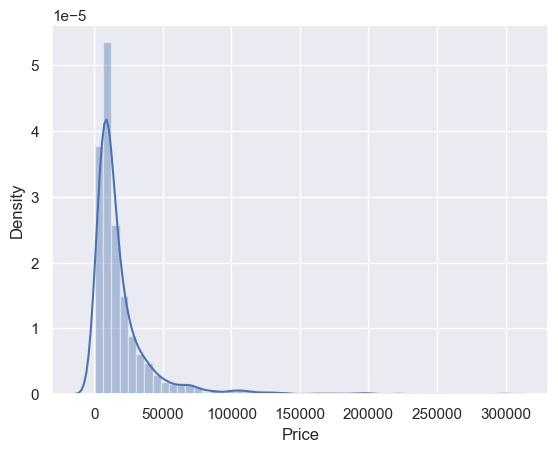

In [ ]:
sns.distplot(data['Price'])

In [ ]:
q=data['Price'].quantile(0.99)
data1=data[data['Price']<q]

C:\Users\91930\AppData\Local\Temp\ipykernel_7400\771842081.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

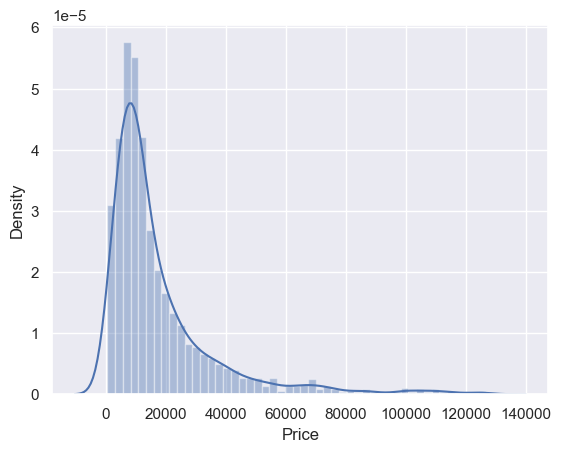

In [ ]:
sns.distplot(data1['Price'])

C:\Users\91930\AppData\Local\Temp\ipykernel_7400\3941922201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

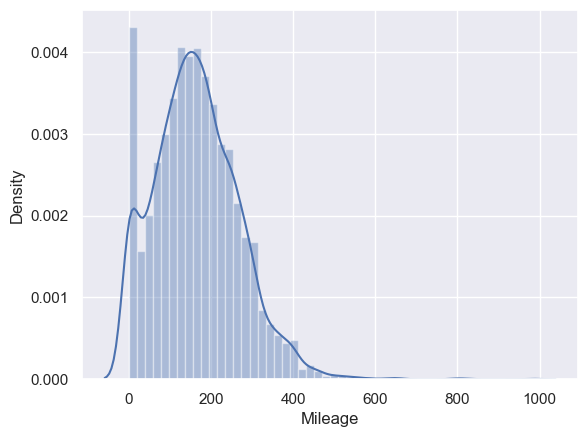

In [ ]:
sns.distplot(data1['Mileage'])

In [ ]:
q=data1['Mileage'].quantile(0.99)
data2=data1[data1['Mileage']<q]

C:\Users\91930\AppData\Local\Temp\ipykernel_7400\3426246741.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

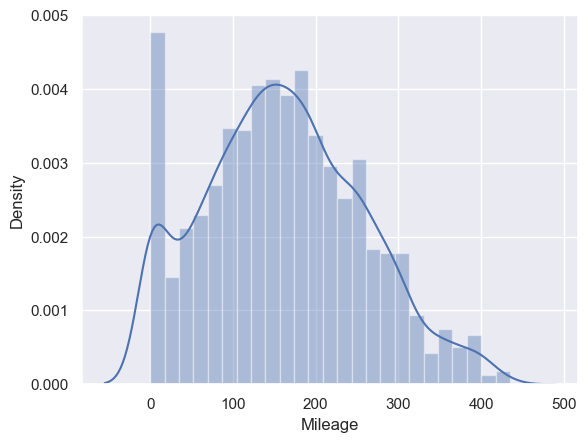

In [ ]:
sns.distplot(data2['Mileage'])

C:\Users\91930\AppData\Local\Temp\ipykernel_7400\252089099.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

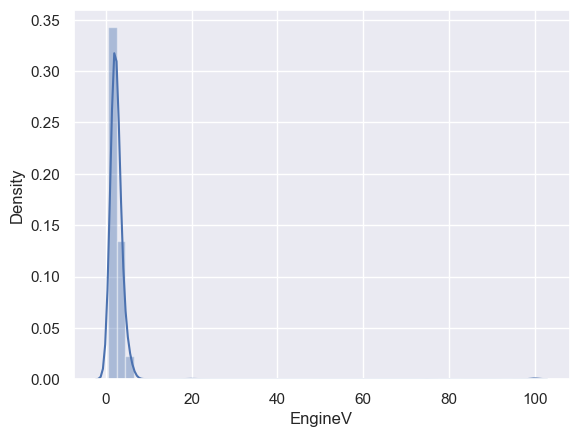

In [ ]:
sns.distplot(data2['EngineV'])

In [ ]:
data2['Mileage']

0       277
1       427
2       358
3       240
4       120
       ... 
4339     35
4340      9
4341      1
4342    194
4344    124
Name: Mileage, Length: 3944, dtype: int64

In [ ]:
data3 = data2[data2['EngineV']<6.5]

C:\Users\91930\AppData\Local\Temp\ipykernel_7400\2868281899.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

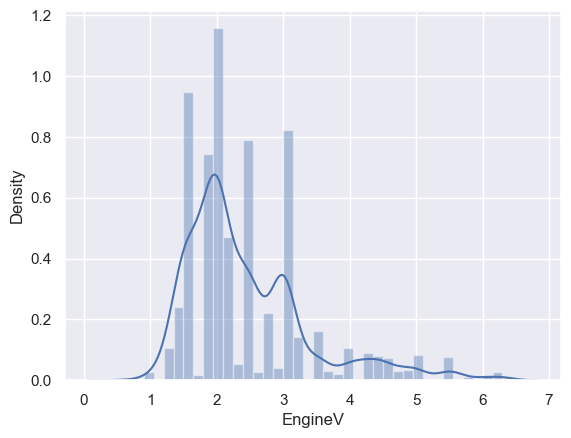

In [ ]:
sns.distplot(data3['EngineV'])

In [ ]:
data_cleaned = data3.reset_index(drop=True)

In [ ]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Model
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921
unique,7,NaN,6,NaN,NaN,4,2,298
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,E-Class
freq,862,NaN,1499,NaN,NaN,1818,3559,185
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,NaN
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,NaN
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,NaN
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,NaN


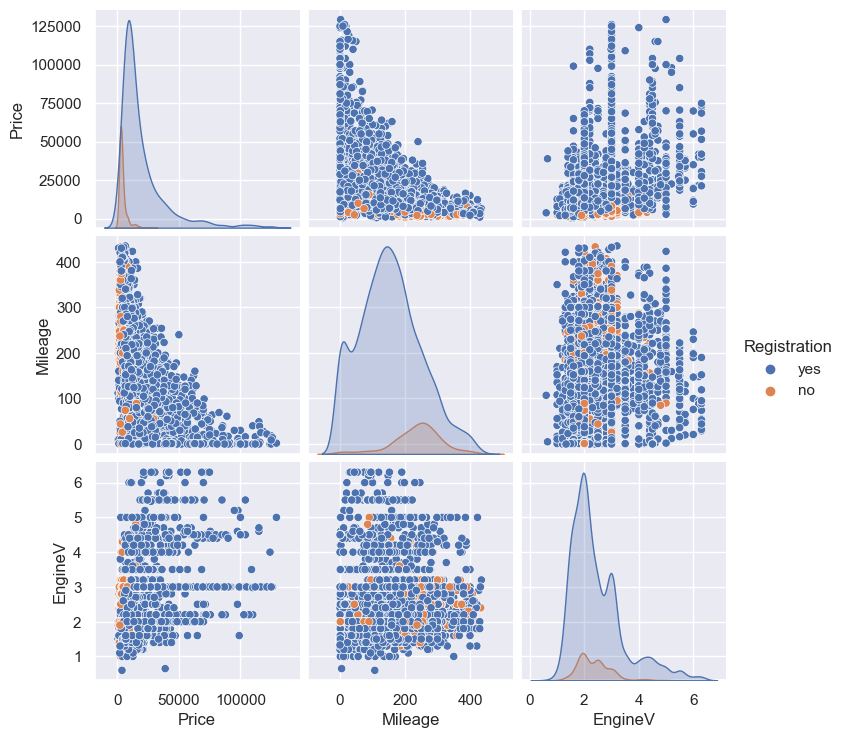

In [ ]:
sns.pairplot(data_cleaned,hue='Registration')

In [ ]:
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...
3916,Toyota,17900.0,sedan,35,1.6,Petrol,yes,Corolla,9.792556
3917,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,S 350,11.736069
3918,BMW,6500.0,sedan,1,3.5,Petrol,yes,535,8.779557
3919,BMW,8000.0,sedan,194,2.0,Petrol,yes,520,8.987197


C:\Users\91930\AppData\Local\Temp\ipykernel_7400\820999756.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['log_price'])


<Axes: xlabel='log_price', ylabel='Density'>

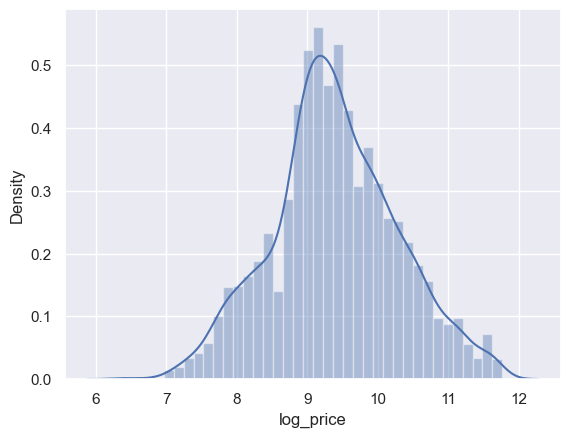

In [ ]:
sns.distplot(data_cleaned['log_price'])

In [ ]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [ ]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True)

In [ ]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,427,2.9,8.974618,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,358,5.0,9.495519,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,240,4.2,10.043249,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,120,2.0,9.814656,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_21', 'Model_210',
       'Model_220', 'Model_230', 'Model_25', 'Model_250', 'Model_300',
       'Model_316', 'Model_318', 'Model_320', 'Model_323', 'Model_325',
       'Model_328', 'Model_330', 'Model_335', 'Model_4 Series Gran Coupe',
       'Model_428', 'Model_4Runner', 'Model_5', 'Model_5 Series',
       'Model_5 Series GT', 'Model_520', 'Model_523', 'Model_524',
       'Model_525', 'Model_528', 'Model_530', 'Model_535', 'Model_540',
       'Model_545', 'Model_550', 'Model_6 Series Gran Coupe', 'Model_630',
       'Model_640', 'Model_645',

In [ ]:
cols=['log_price','Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_760', 'Model_80', 'Model_9', 'Model_90',
       'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
       'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
       'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8',
       'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon',
       'Model_Avensis', 'Model_Aygo', 'Model_B 170', 'Model_B 180',
       'Model_B 200', 'Model_Beetle', 'Model_Bora', 'Model_C-Class',
       'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CL 63 AMG', 'Model_CLA 200', 'Model_CLA 220',
       'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
       'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
       'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430', 'Model_CLS 350',
       'Model_CLS 400', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
       'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
       'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
       'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
       'Model_I3', 'Model_IQ', 'Model_Jetta', 'Model_Kangoo',
       'Model_Koleos', 'Model_L 200', 'Model_LT', 'Model_Laguna',
       'Model_Lancer', 'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
       'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
       'Model_ML 63 AMG', 'Model_Master', 'Model_Matrix', 'Model_Megane',
       'Model_Modus', 'Model_Multivan', 'Model_New Beetle',
       'Model_Outlander', 'Model_Outlander XL', 'Model_Pajero',
       'Model_Pajero Pinin', 'Model_Pajero Sport', 'Model_Pajero Wagon',
       'Model_Passat B3', 'Model_Passat B4', 'Model_Passat B5',
       'Model_Passat B6', 'Model_Passat B7', 'Model_Passat B8',
       'Model_Passat CC', 'Model_Phaeton', 'Model_Pointer', 'Model_Polo',
       'Model_Previa', 'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7',
       'Model_R 320', 'Model_R8', 'Model_Rav 4', 'Model_S 140',
       'Model_S 250', 'Model_S 300', 'Model_S 320', 'Model_S 350',
       'Model_S 400', 'Model_S 430', 'Model_S 500', 'Model_S 550',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4',
       'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
       'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
       'Model_Symbol', 'Model_Syncro', 'Model_T3 (Transporter)',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_V 250',
       'Model_Vaneo', 'Model_Vento', 'Model_Venza', 'Model_Viano',
       'Model_Virage', 'Model_Vista', 'Model_Vito', 'Model_X1',
       'Model_X3', 'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_X6 M',
       'Model_Yaris', 'Model_Z3', 'Model_Z4']

In [ ]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,8.974618,427,2.9,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9.495519,358,5.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,10.043249,240,4.2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9.814656,120,2.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,8.974618,427,2.9,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9.495519,358,5.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,10.043249,240,4.2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9.814656,120,2.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
 data_preprocessed=data_preprocessed.drop(['Brand_Mercedes-Benz','Model_Trafic','Model_Vito','Model_Passat B5'],axis=1)

In [ ]:
targets =  data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs =  data_preprocessed.drop(['log_price'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [ ]:
inputs_scaled = scaler.transform(inputs)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [ ]:
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)



LinearRegression()

In [ ]:
y_hat = reg.predict(x_train)

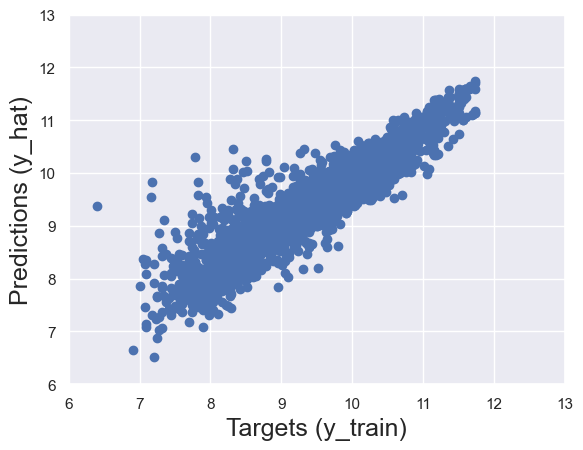

In [ ]:
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\91930\AppData\Local\Temp\ipykernel_7400\918543696.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

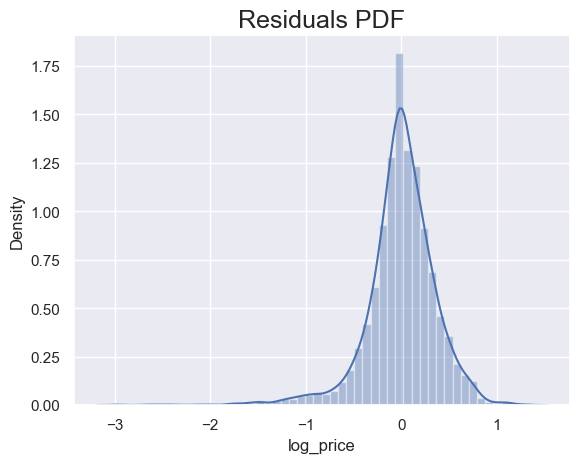

In [ ]:
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)


In [ ]:
from sklearn.feature_selection import f_regression

In [ ]:
f_regression(x_train,y_train)

(array([1.75898175e+03, 6.40409239e+02, 3.04946259e+01, 1.28673498e+01,
        1.35273943e+02, 6.38288215e+01, 3.67667492e+01, 8.15842399e+01,
        3.28190897e+00, 6.37465583e+01, 9.51784999e+01, 3.09764189e+01,
        2.17259094e+01, 5.94414671e+00, 2.60771153e+00, 7.85393151e+02,
        2.57340096e+01, 4.55356808e+00, 4.14768919e-03, 2.00268968e-03,
        1.92194022e+00, 6.23500730e+00, 1.48831593e+01, 7.06610423e+00,
        2.55250811e+00, 4.99881900e-01, 5.93275688e+00, 1.87032206e+01,
        7.36904098e-01, 2.81559589e+00, 8.55086701e+00, 3.18917258e+01,
        1.90496088e+01, 2.06648625e+00, 7.41121737e-01, 4.62857041e-02,
        2.13493624e-01, 7.30141357e-01, 2.71808596e+00, 1.62956534e+00,
        1.33488080e-13, 2.64184029e+00, 4.96815027e+00, 5.62963902e+00,
        1.48559069e+00, 2.55374681e+00, 3.52020464e+01, 9.31419739e-01,
        2.02218406e+00, 1.86484458e+00, 2.96118011e+00, 2.49780714e-01,
        1.13022317e+01, 4.85668174e+00, 4.94011180e-01, 1.638118

In [ ]:
p_values = f_regression(x_train,y_train)[1]

In [ ]:
reg_summary = pd.DataFrame(data =inputs.columns.values,columns=['Features'])
reg_summary ['Coefficients'] = reg.coef_
reg_summary ['p-values'] = p_values.round(3)
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot
pd.set_option('display.float_format', lambda x: '%.2f' % x)

reg_summary.sort_values(by=['p-values'])

,Features,Coefficients,p-values
0,Mileage,-0.35,0.00
55,Model_640,0.05,0.00
64,Model_80,-0.05,0.00
73,Model_A4,0.01,0.00
76,Model_A6,0.05,0.00
136,Model_G 500,0.06,0.00
140,Model_GL 350,0.07,0.00
146,Model_GLE-Class,0.07,0.00
149,Model_GLS 350,0.09,0.00
150,Model_GLS 400,0.04,0.00


In [ ]:
reg.score(x_train,y_train)

0.8324562537498027

In [ ]:
reg.intercept_

-17372256511.658825

In [ ]:
y_hat_test = reg.predict(x_test)

In [ ]:
x_test



array([[ 1.02773597, -0.46877392, -0.43752849, ..., -0.05986077,
        -0.01597191, -0.03573252],
       [-0.4297469 ,  0.05972389, -0.43752849, ..., -0.05986077,
        -0.01597191, -0.03573252],
       [ 2.48521884, -0.15167523, -0.43752849, ..., -0.05986077,
        -0.01597191, -0.03573252],
       ...,
       [ 0.2157098 ,  0.27112302, -0.43752849, ..., -0.05986077,
        -0.01597191, -0.03573252],
       [ 0.66336525, -0.04597567, -0.43752849, ..., -0.05986077,
        -0.01597191, -0.03573252],
       [-0.28399861, -0.04597567, -0.43752849, ..., -0.05986077,
        -0.01597191, -0.03573252]])

In [ ]:
data_preprocessed.head()


,log_price,Mileage,EngineV,Brand_BMW,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,...,Model_Vista,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.34,277,2.00,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,8.97,427,2.90,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9.50,358,5.00,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,10.04,240,4.20,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9.81,120,2.00,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


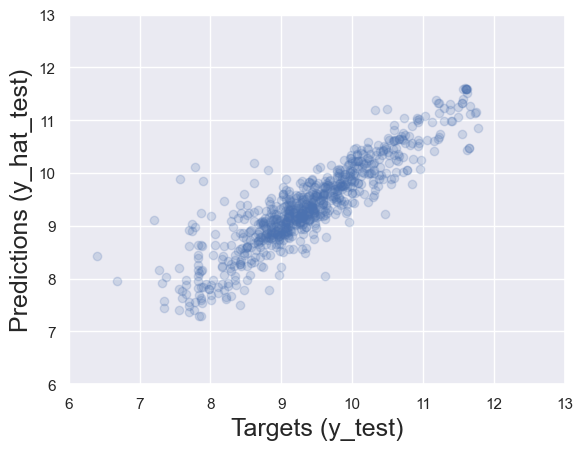

In [ ]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [ ]:

results = sm.OLS(y_train,x_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     49.31
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:55:23   Log-Likelihood:                -1285.5
No. Observations:                3136   AIC:                             3147.
Df Residuals:                    2848   BIC:                             4890.
Df Model:                         287                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3500      0.009    -37.367      0.000      -0.368      -0.332
x2             0.0433      0.018      2.392      0.017       0.008       0.079
x3            -0.0512      0.101     -0.506      0.613      -0.249       0.147
x4            -2.6929      0.008   -319.494      0.000      -2.709      -2.676
x5            -0.0789      0.020     -4.042      0.000      -0.117      -0.041
x6            -0.4656      0.092     -5.074      0.000      -0.646      -0.286
x7            -0.0744      0.033     -2.279      0.023      -0.138      -0.010
x8            -0.0684      0.018     -3.826      0.000      -0.103      -0.033
x9            -0.0088      0.016     -0.537      0.591      -0.041       0.023
x10           -0.0418      0.029     -1.438      0.150      -0.099       0.015
x11           -0.0470      0.018     -2.673      0.008      -0.082      -0.013
x12           -0.0165      0.023     -0.710      0.478      -0.062       0.029
x13           -0.1021      0.009    -11.021      0.000      -0.120      -0.084
x14           -0.0287      0.008     -3.785      0.000      -0.044      -0.014
x15           -0.1283      0.011    -12.201      0.000      -0.149      -0.108
x16            0.3070      0.008     37.894      0.000       0.291       0.323
x17           -0.0372      0.008     -4.883      0.000      -0.052      -0.022
x18           -0.0280      0.006     -4.482      0.000      -0.040      -0.016
x19            0.0232      0.010      2.379      0.017       0.004       0.042
x20            0.0234      0.011      2.193      0.028       0.002       0.044
x21           -0.0199      0.008     -2.651      0.008      -0.035      -0.005
x22           -0.0221      0.006     -3.510      0.000      -0.034      -0.010
x23           -0.0261      0.007     -3.740      0.000      -0.040      -0.012
x24           -0.0045      0.007     -0.640      0.522      -0.018       0.009
x25            0.0010      0.009      0.119      0.905      -0.016       0.018
x26            0.0128      0.006      2.051      0.040       0.001       0.025
x27           -0.0321      0.009     -3.647      0.000      -0.049      -0.015
x28           -0.0346      0.006     -5.409      0.000      -0.047      -0.022
x29           -0.0005      0.006     -0.078      0.938      -0.013       0.012
x30           -0.0140      0.006     -2.262      0.024      -0.026      -0.002
x31           -0.0083      0.013     -0.625      0.532      -0.035       0.018
x32            0.0067      0.024      0.276      0.783      -0.041       0.055
x33            0.0366      0.033      1.111      0.267      -0.028       0.101
x34           -0.0133      0.009     -1.521      0.128      -0.030       0.004
x35           -0.0060      0.014     -0.420      0.675      -0.034       0.022
x36            0.0120      0.014      0.876      0.381      -0.015       0.039
x3

In [ ]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

C:\Users\91930\AppData\Local\Temp\ipykernel_7400\1168990217.py:1: RuntimeWarning: overflow encountered in exp
  df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])


,Prediction
0,6762.35
1,19302.25
2,5445.82
3,12547.43
4,5742.18


In [ ]:
y11=pd.DataFrame(data=['Maruti',''])

In [ ]:
df_pf['Target'] = np.exp(y_test)
df_pf


,Prediction,Target
0,6762.35,NaN
1,19302.25,7900.00
2,5445.82,NaN
3,12547.43,NaN
4,5742.18,NaN
5,4454.90,14200.00
6,0.00,NaN
7,81795.49,NaN
8,6247.33,11950.00
9,9786.09,NaN


In [ ]:
y_test = y_test.reset_index(drop=True)


y_test.head()

0   8.94
1   9.43
2   8.52
3   9.10
4   8.78
Name: log_price, dtype: float64

In [ ]:
df_pf['Target'] = np.exp(y_test)
df_pf



,Prediction,Target
0,6762.35,7650.00
1,19302.25,12500.00
2,5445.82,5000.00
3,12547.43,8999.00
4,5742.18,6500.00
5,4454.90,5600.00
6,0.00,15300.00
7,81795.49,88000.00
8,6247.33,5200.00
9,9786.09,10000.00


In [ ]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [ ]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,6762.35,7650.00,887.65,11.60
1,19302.25,12500.00,-6802.25,54.42
2,5445.82,5000.00,-445.82,8.92
3,12547.43,8999.00,-3548.43,39.43
4,5742.18,6500.00,757.82,11.66
5,4454.90,5600.00,1145.10,20.45
6,0.00,15300.00,15300.00,100.00
7,81795.49,88000.00,6204.51,7.05
8,6247.33,5200.00,-1047.33,20.14
9,9786.09,10000.00,213.91,2.14


In [ ]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
320,6500.17,6500.00,-0.17,0.00
616,19522.33,19500.00,-22.33,0.11
683,17628.75,17650.00,21.25,0.12
279,26866.70,26900.00,33.30,0.12
76,27957.84,28000.00,42.16,0.15
557,6018.53,6000.00,-18.53,0.31
145,7724.17,7750.00,25.83,0.33
758,8730.93,8700.00,-30.93,0.36
410,14753.55,14700.00,-53.55,0.36
583,14446.91,14500.00,53.09,0.37
